<a href='http://www.holoviews.org'><img src="assets/hv+bk.png" alt="HV+BK logos" width="40%;" align="left"/></a>
<div style="float:right;"><h2>01. Introduction to Elements</h2></div>

## Preliminaries

If the  ``hvtutorial`` environment has been correctly created and activated using the instructions listed on the [welcome](00-welcome.ipynb) page, the following imports should run and ``hv.extension('bokeh')``  should present a small HoloViews logo:

In [6]:
import numpy as np
import pandas as pd
import holoviews as hv
hv.extension(inline='bokeh')

Here we import the [NumPy](http://numpy.org) and [pandas](http://pandas.org) data libraries with their standard abbreviations, plus HoloViews with its standard abbreviation ``hv``. The line reading ``hv.extension('bokeh')`` loads and activates the bokeh plotting backend, so all visualizations will be generated using [Bokeh](bokeh.pydata.org). We will see how to use matplotlib instead of bokeh later in the tutorial [Customizing Visual Appearance](./02-customizing-visual-appearance.ipynb).

# What are elements?

In short, elements are HoloViews' most basic, core primitives. All the various types of ``hv.Element`` accept semantic metadata that allows their input data to be given an automatic, visual representation. Most importantly, element objects always preserve the raw data they are supplied.

In this notebook we will explore a number of different element types and examine some of the ways that elements can supplement the supplied data with useful semantic data. To choose your own types to use in the exercises, you can browse them all in the [reference gallery](http://holoviews.org/reference/index.html).

## Creating elements

All basic elements accept their data as a single, mandatory positional argument which may be supplied in a number of different formats, some of which we will now examine. A handful of *annotation* elements are exceptions to this rule, namely ``Arrow``, ``Text``, ``Bounds``, ``Box`` and ``Ellipse``, as they require additional positional arguments.

### A simple curve

To start with a simple example, we will sample a quadratic function $y=100-x^2$ at 21 different values of $x$ and wrap that data in a HoloViews element:

:Curve   [x]   (y)
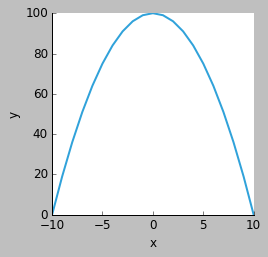

In [7]:
xs = [i for i in range(-10,11)]
ys = [100-(x**2) for x in xs]
simple_curve = hv.Curve((xs,ys))
simple_curve

Here we supplied two lists of values as a tuple to [``hv.Curve``]((http://build.holoviews.org/reference/elements/bokeh/Curve.html), assigned the result to the attribute ``simple_curve``, and let Jupyter display the object using its default visual representation.  As you can see, that default visual representation is a Bokeh plot, which is automatically generated by HoloViews when Jupyter requests it. But ``simple_curve`` itself is just a wrapper around your data, not a plot, and you can choose other representations that are not plots.  For instance, printing the object will give you a purely textual representation instead:

In [8]:
print(simple_curve)

:Curve   [x]   (y)


The textual representation indicates that this object is a continuous mapping from `x` to `y`, which is how HoloViews knew to render it as a continuous curve.  You can also access the full original data if you wish:

In [9]:
#simple_curve.data

If you uncomment that line, you should see the original data values, though in some cases like this one the data has been converted to a better format (a Pandas dataframe instead of Python lists).

There are a number of similar elements to [``Curve``](http://build.holoviews.org/reference/elements/bokeh/Curve.html) such as [``Area``](http://build.holoviews.org/reference/elements/bokeh/Area.html) and [``Scatter``](http://build.holoviews.org/reference/elements/bokeh/Scatter.html), which you can try out for yourself in the exercises.

In [10]:
# Exercise: Try switching hv.Curve with hv.Area and hv.Scatter


In [11]:
# Optional: 
# Look at the .data attribute of the elements you created to see the raw data (as a pandas DataFrame)


### Annotating the curve

Wrapping your data (``xs`` and ``ys``) here as a HoloViews element is sufficient to make it visualizable, but there are many other aspects of the data that we can capture to convey more about its meaning to HoloViews. For instance, we might want to specify what the x-axis and y-axis actually correspond to, in the real world. Perhaps this parabola is the trajectory of a ball thrown into the air, in which case we could declare the object as:

:Curve   [distance]   (height)
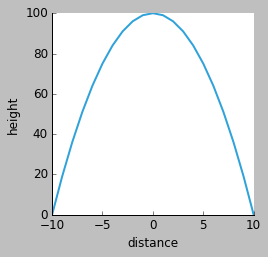

In [12]:
trajectory = hv.Curve((xs,ys), kdims=['distance'], vdims=['height'])
trajectory

Here we have added *semantic* information about our data to the [``Curve``](http://build.holoviews.org/reference/elements/bokeh/Curve.html) element.  Specifically, we told HoloViews that the ``kdim`` or *key dimension* of our data corresponds to the real-world independent variable ('distance'), and the ``vdim`` or *value dimension* 'height' is the real-world dependent variable. Even though the additional information we provided is about the *data*, not directly about the plot, HoloViews is designed to reveal the properties of your data accurately, and so the axes now update to show what these dimensions represent.

In [13]:
# Exercise: Take a look at trajectory.vdims


### Casting between elements

The type of an element is a declaration of important facts about your data, which gives HoloViews the appropriate hint required to generate a suitable visual representation from it. For instance, calling it a ``Curve`` is a declaration from the user that the data consists of samples from an underlying continuous function, which is why HoloViews plots it as a connected object. If we convert to an ``hv.Scatter`` object instead, the same set of data will show up as separated points, because "Scatter" does not make an assumption that the data is meant to be continuous:

:Scatter   [x]   (y)
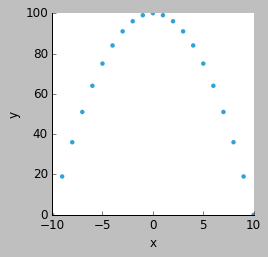

In [14]:
hv.Scatter(simple_curve)

Casting the same data between different Element types in this way is often useful as a way to see your data differently, particularly if you are not certain of a single best way to interpret the data.  Casting preserves your declared metadata as much as possible, propagating your declarations from the original object to the new one.

In [15]:
# How do you predict the representation for hv.Scatter(trajectory) will differ from
# hv.Scatter(simple_curve) above? Try it!


In [16]:
# Also try casting the trajectory to an area then back to a curve.


### Turning arrays into elements

The curve above was constructed from a list of x-values and a list of y-values. Next we will create an element using an entirely different datatype, namely a [NumPy](http://www.numpy.org/) array:

In [17]:
x = np.linspace(0, 10, 500)
y = np.linspace(0, 10, 500)
xx, yy = np.meshgrid(x, y)

arr = np.sin(xx)*np.cos(yy)
image = hv.Image(arr)

As above, we know that this data was sampled from a continuous function, but this time the data is mapping from *two* key dimensions, so we declare it as an [``hv.Image``]((http://build.holoviews.org/reference/elements/bokeh/Image.html) object.  As you might expect, an ``Image`` object is visualized as an image by default:

:Image   [x,y]   (z)
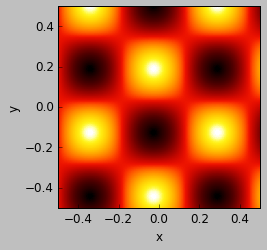

In [18]:
image

In [19]:
# Exercise: Try visualizing different two-dimensional arrays.
# You can try a new function entirely or simple modifications of the existing one
# E.g., explore the effect of squaring and cubing the sine and cosine terms


In [20]:
# Optional: Try supplying appropriate labels for the x- and y- axes
# Hint: The x,y positions are how you *index* (or key) the array *values* (so x and y are both kdims)


### Selecting columns from tables to make elements

In addition to basic Python datatypes and [xarray](xarray.pydata.org) and [NumPy](www.numpy.org) array types, HoloViews elements can be passed tabular data in the form of pandas [DataFrames](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html):

In [21]:
economic_data = pd.read_csv('../data/macro.csv')
economic_data.tail()

,country,year,growth,unem,capmob,trade
345,Japan,1986,2.5,2.800000,0,29.161590
346,Japan,1987,4.4,2.900000,0,21.909870
347,Japan,1988,5.7,2.500000,0,21.712350
348,Japan,1989,4.7,2.264753,0,23.128797
349,Japan,1990,5.2,2.098997,0,20.000304


Let's build an element that helps us understand how the percentage growth in US GDP varies over time. As our dataframe contains GDP growth data for lots of countries, let us select the United States from the table and create a [``Curve``](http://build.holoviews.org/reference/elements/bokeh/Curve.html) element from it:

In [22]:
US_data = economic_data[economic_data['country'] == 'United States'] # Select data for the US only
US_data.tail()

,country,year,growth,unem,capmob,trade
20,United States,1986,2.8,7.000000,0,17.203710
21,United States,1987,3.7,6.200000,0,17.230950
22,United States,1988,4.6,5.500000,0,18.294180
23,United States,1989,2.8,5.270084,0,19.413526
24,United States,1990,0.9,5.414560,0,20.638364


:Curve   [year]   (growth)
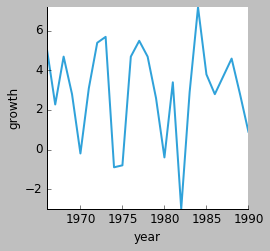

In [23]:
growth_curve = hv.Curve(US_data, kdims=['year'], vdims=['growth'])
growth_curve

In this case, declaring the ``kdims`` and ``vdims`` does not simply declare the axis labels, it allows HoloViews to discover which columns of the data should be used from the dataframe for each of the axes.

In [24]:
# Exercise: Plot the unemployment (unem) over year


### Dimension labels

In this example, the simplistic axis labels are starting to get rather limiting. Changing the ``kdims`` and ``vdims`` is no longer trivial either, as they need to match the column names in the dataframe. Is the only solution to rename the columns in our dataframe to something more descriptive but more awkward to type?

Luckily, no. The recommendation is that you continue to use short, programmer and pandas-friendly, [tab-completeable](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe-column-attribute-access-and-ipython-completion) column names as these are also the most convenient dimension names to use with HoloViews.

What you should do instead is set the *dimension labels*, using the fact that dimensions are full, rich objects behind the scenes: 

:Curve   [year]   (growth)
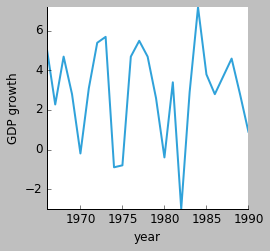

In [25]:
gdp_growth = growth_curve.redim.label(growth='GDP growth')
gdp_growth

With the ``redim`` method, we have associated a *dimension label* with the ``growth`` dimension, resulting in a new element called ``gdp_growth`` (you can check for yourself that ``growth_curve`` is unchanged). Let's look at what the new dimension contains:

In [26]:
gdp_growth.vdims

[Dimension('growth', label='GDP growth')]

In [27]:
# Exercise: Use redim.label to give the year dimension a better label


The ``redim`` utility lets you easily change other [dimension parameters](), and as an example let's give our GDP growth dimension the appropriate unit:

:Curve   [year]   (growth)
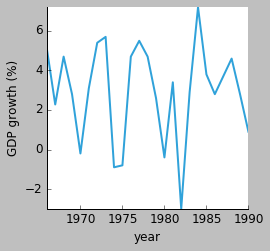

In [28]:
gdp_growth.redim.unit(growth='%')

In [29]:
# Exercise: Use redim.unit to give the year dimension a better unit 
# For instance, relabel to 'Time' then give the unit as 'year'


## Composing elements together

Viewing a single element at a time often conveys very little information for the space used. In this section, we introduce the two composition operators ``+`` and ``*`` to build [``Layout``](http://build.holoviews.org/reference/containers/bokeh/Layout.html) and [``Overlay``](http://build.holoviews.org/reference/containers/bokeh/Overlay.html) objects.

### Layouts

Earlier on we were casting a parabola to different element types. Viewing the different types was awkward, wasting lots of vertical space in the notebook. What we will often want to do is view these elements side by side:

:Layout
   .Curve.I   :Curve   [distance]   (height)
   .Scatter.I :Scatter   [distance]   (height)
   .Area.I    :Area   [distance]   (height)
   .Spikes.I  :Spikes   [distance]   (height)
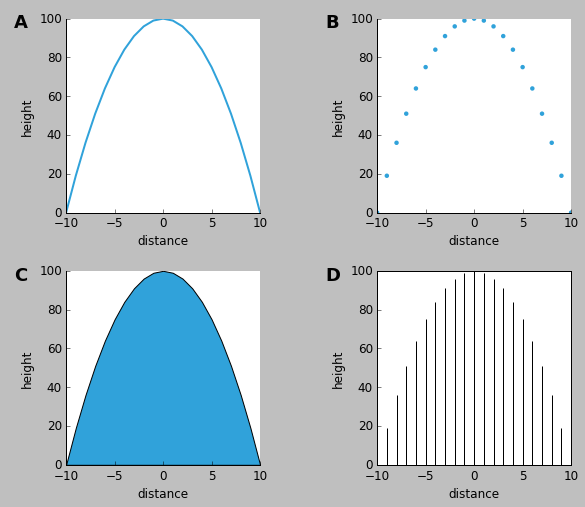

In [30]:
layout = trajectory + hv.Scatter(trajectory) + hv.Area(trajectory) + hv.Spikes(trajectory)
layout.cols(2)

What we have created with the ``+`` operator is an [``hv.Layout``](http://build.holoviews.org/reference/containers/bokeh/Layout.html) object (with a hint that a two-column layout is desired):

In [31]:
print(layout)

:Layout
   .Curve.I   :Curve   [distance]   (height)
   .Scatter.I :Scatter   [distance]   (height)
   .Area.I    :Area   [distance]   (height)
   .Spikes.I  :Spikes   [distance]   (height)


Now let us build a new layout by selecting elements from ``layout``:

:Layout
   .Curve.I  :Curve   [distance]   (height)
   .Spikes.I :Spikes   [distance]   (height)
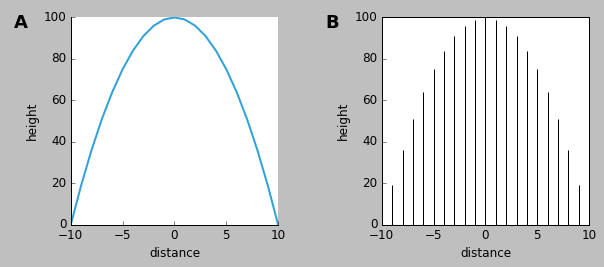

In [32]:
layout.Curve.I + layout.Spikes.I

We see that a ``Layout`` lets us pick component elements via two levels of tab-completable attribute access. Note that by default the type of the element defines the first level of access and the second level of access automatically uses Roman numerals (because Python identifiers cannot start with numbers).

These two levels correspond to another type of semantic declaration that applies to the elements directly (rather than their dimensions), called ``group`` and ``label``.  Specifically, ``group`` allows you to declare what kind of thing this object is, while ``label`` allows you to label which specific object it is.  What you put in those declarations, if anything, will form the title of the plot:

:Layout
   .Trajectory.Cannonball :Curve   [distance]   (height)
   .Trajectory.Filled     :Area   [distance]   (height)
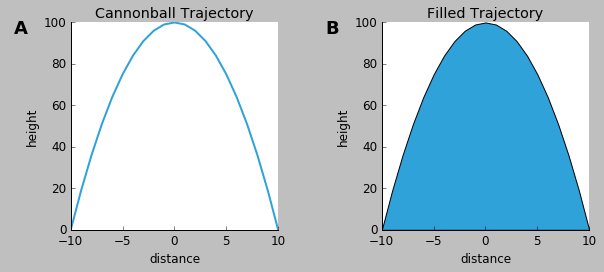

In [33]:
cannonball = trajectory.relabel('Cannonball', group='Trajectory')
integral = hv.Area(trajectory).relabel('Filled', group='Trajectory')
labelled_layout = cannonball + integral
labelled_layout 

In [34]:
# Exercise: Try out the tab-completion of labelled_layout to build a new layout swapping the position of these elements


In [35]:
# Optional: Try using two levels of dictionary-style access to grab the cannonball trajectory


### Overlays

Layout places objects side by side, allowing it to collect (almost!) any HoloViews objects that you want to indicate are related.  Another operator ``*`` allows you to overlay elements into a single plot, if they live in the same space (with matching dimensions and similar ranges over those dimensions).  The result of ``*`` is an [``Overlay``](http://build.holoviews.org/reference/containers/bokeh/Overlay.html):

:Overlay
   .Curve.I  :Curve   [distance]   (height)
   .Spikes.I :Spikes   [distance]   (height)
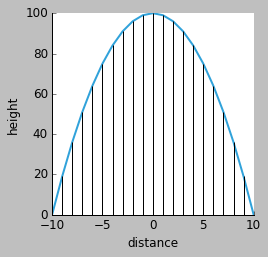

In [36]:
trajectory * hv.Spikes(trajectory)

The indexing system of [``Overlay``](http://build.holoviews.org/reference/containers/bokeh/Overlay.html) is identical to that of [``Layout``](http://build.holoviews.org/reference/containers/bokeh/Layout.html).

In [37]:
# Exercise: Make an overlay of the Spikes object from layout on top of the filled trajectory area of labelled_layout


One thing that is specific to Overlays is the use of color cycles to automatically differentiate between elements of the same type and ``group``:

:Layout
   .Trajectory.Cannonball  :Curve   [distance]   (height)
   .Trajectory.Tennis_Ball :Curve   [distance]   (height)
   .Trajectory.I           :Overlay
      .Trajectory.Cannonball  :Curve   [distance]   (height)
      .Trajectory.Tennis_Ball :Curve   [distance]   (height)
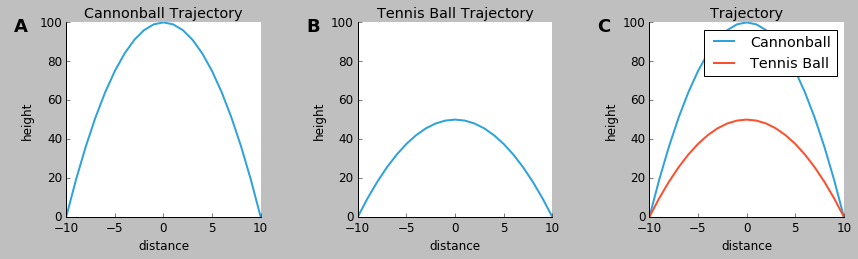

In [46]:
tennis_ball = cannonball.clone((xs, 0.5*np.array(ys)), label='Tennis Ball')
cannonball + tennis_ball + (cannonball * tennis_ball)

Here we use the ``clone`` method to make a shallower tennis-ball trajectory: the ``clone`` method create a new object that preserves semantic metadata while allowing overrides (in this case we override the input data and the ``label``).

As you can see, HoloViews can determine that the two overlaid curves will be distinguished by color, and so it also provides a legend so that the mapping from color to data is clear.

In [39]:
# Optional Exercise: 
# 1. Create a thrown_ball curve with half the height of tennis_ball by cloning it and assigning the label 'Thrown ball'
# 2. Add thrown_ball to the overlay


## Slicing and selecting

HoloViews elements can be easily sliced using array-style syntax or using the ``.select`` method. The following example shows how we can slice the ``cannonball`` trajectory into it's ascending and descending components:

:AdjointLayout
   :Overlay
      .Trajectory.Ascending  :Curve   [distance]   (height)
      .Trajectory.Descending :Curve   [distance]   (height)
   :Histogram   [height]   (Frequency)
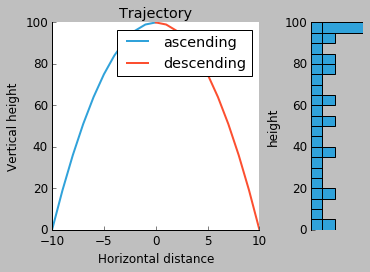

In [48]:
full_trajectory = cannonball.redim.label(distance='Horizontal distance', height='Vertical height')
ascending = full_trajectory[-10:1].relabel('ascending')
descending = cannonball.select(distance=(0,11.)).relabel('descending')
ascending * descending.hist()

Note that the slicing in HoloViews is done in the continuous space of the dimension and not in the integer space of individual data samples. In this instance, the slice is over the ``distance`` dimension and we can see that the slicing semantics follow the usual Python convention of an inclusive lower bound and an exclusive upper bound.

This example also illustrates why we keep simple identifiers for dimension names and reserve longer descriptions for the dimension labels: certain methods such as the ``select`` method shown above accept dimension names as keywords.

# Onwards

Later in the tutorial, we will see how elements and the principles of composition extend to *containers* (such as ) which make data exploration quick, easy and interactive. Before we examine the container types, we will look at how to customize the appearance of elements, change the plotting extension and specify output formats.

For a quick demonstration related to what we will be covering, hit the kernel restart button (⟳) in the toolbar for this notebook, change ``hv.extension('bokeh')`` to ``hv.extension('matplotlib')`` in the first cell and rerun the notebook!